In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

data_root_dir = Path(os.path.expanduser("~")) / "bmcs_training_data"
sample_dirs = [d for d in data_root_dir.iterdir() if d.is_dir()]


C:\Users\A_structure\bmcs_training_data\1C_0.2A


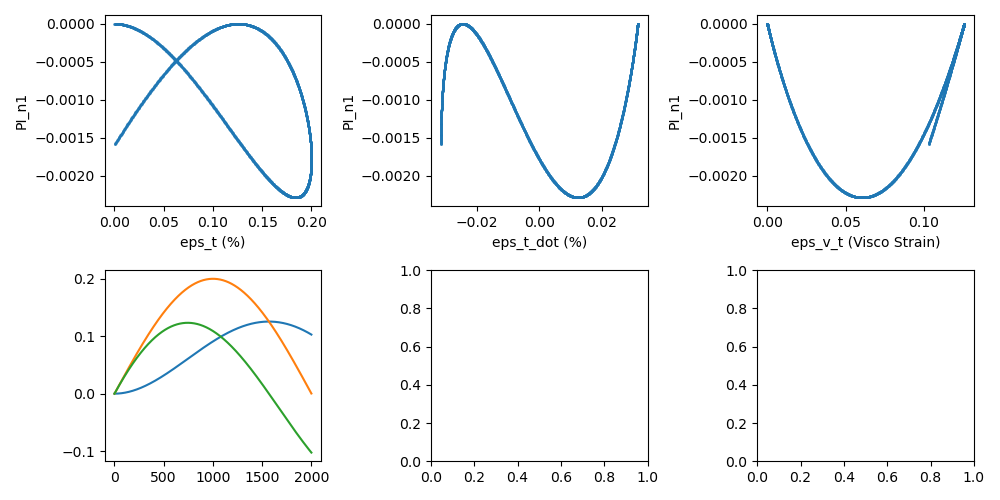

In [37]:
%matplotlib widget
selected_samples = sample_dirs[21]  # Modify for specific selection
print(selected_samples)
sample_data = np.load(list(selected_samples.glob("Pi_data_*.npy"))[0])

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
    
# Extract variables
eps_t = sample_data[:, 0]*100
delta_eps_t = sample_data[:, 1]  
eps_v_t = sample_data[:, 2]*100
d_t = sample_data[:, 3]  
pi_n1 = sample_data[:, 4]  

# Plot PI_n1 against each input
axes[0,0].scatter(eps_t, pi_n1, s=1, alpha=0.7)
axes[0,0].set_xlabel("eps_t (%)")
axes[0,0].set_ylabel("PI_n1")

axes[0,1].scatter(delta_eps_t*100/d_t, pi_n1, s=1, alpha=0.7)
axes[0,1].set_xlabel("eps_t_dot (%)")
axes[0,1].set_ylabel("PI_n1")

axes[0,2].scatter(eps_v_t, pi_n1, s=1, alpha=0.7)
axes[0,2].set_xlabel("eps_v_t (Visco Strain)")
axes[0,2].set_ylabel("PI_n1")

axes[1,0].plot(eps_v_t)
axes[1,0].plot(eps_t)
axes[1,0].plot(eps_t-eps_v_t)

plt.tight_layout()
plt.show()


C:\Users\A_structure\bmcs_training_data\1C_0.2A


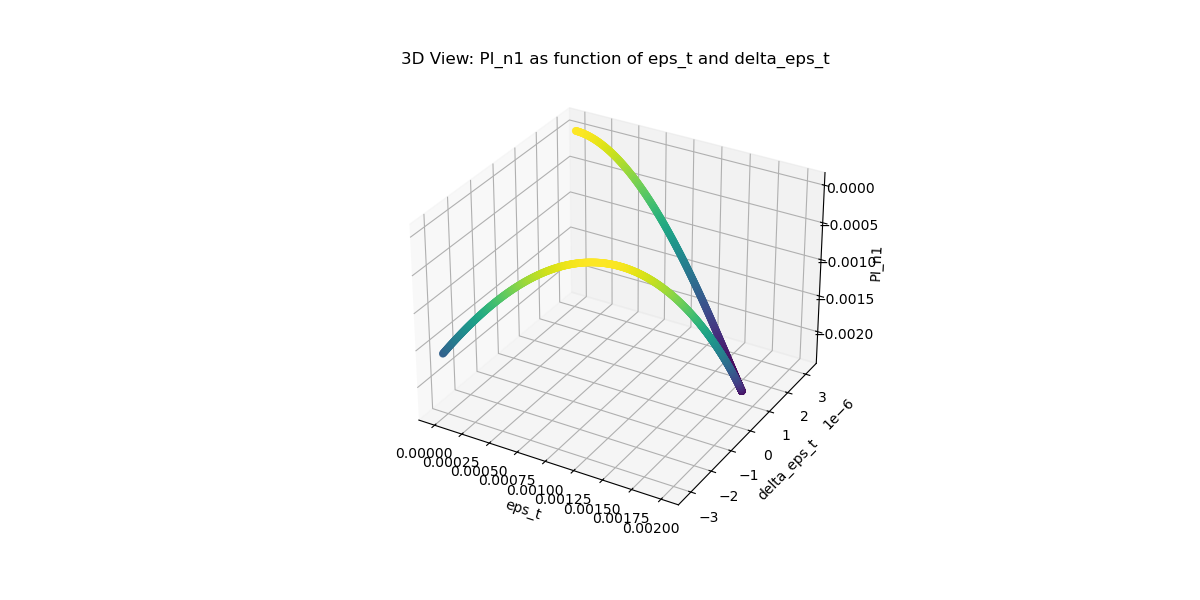

In [25]:
selected_samples = sample_dirs[21]  # Modify for specific selection
print(selected_samples)
sample_data = np.load(list(selected_samples.glob("Pi_data_*.npy"))[0])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

eps_t = sample_data[:, 0]  
delta_eps_t = sample_data[:, 1]  
pi_n1 = sample_data[:, 4]

ax.scatter(eps_t, delta_eps_t, pi_n1, c=pi_n1, cmap='viridis', alpha=0.7)
ax.set_xlabel("eps_t")
ax.set_ylabel("delta_eps_t")
ax.set_zlabel("PI_n1")
ax.set_title("3D View: PI_n1 as function of eps_t and delta_eps_t")

plt.show()


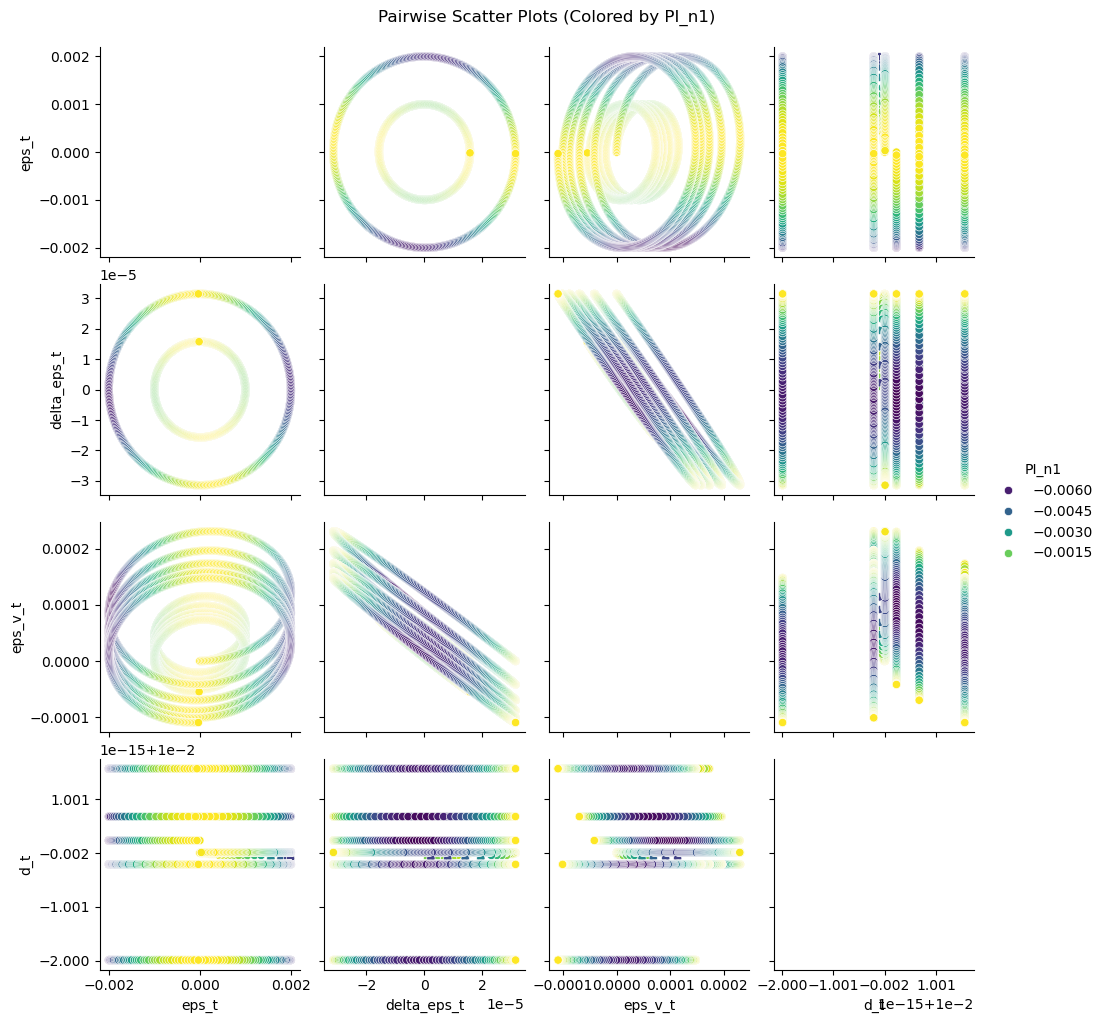

c:\Users\A_structure\anaconda3\envs\bmcs_ml\Lib\site-packages\matplotlib\collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


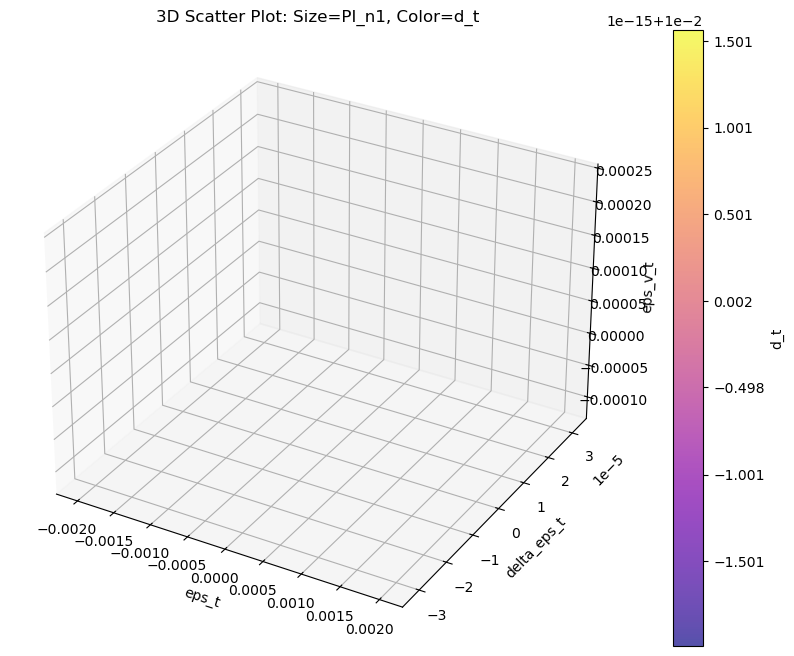

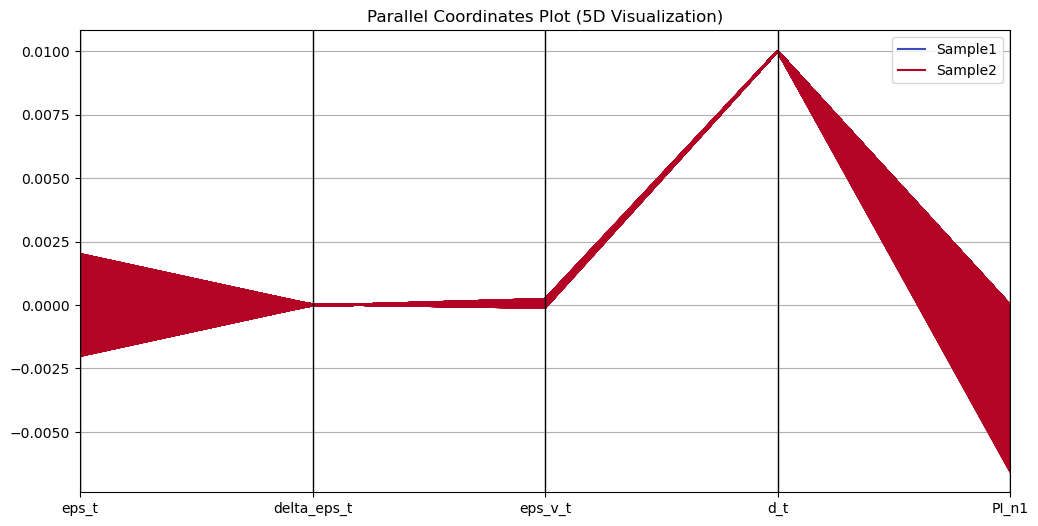

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
from pathlib import Path

# Load sample data from two files
data_root_dir = Path(os.path.expanduser("~")) / "bmcs_training_data"
sample_dirs = [d for d in data_root_dir.iterdir() if d.is_dir()]

if len(sample_dirs) < 2:
    raise ValueError("Not enough samples found!")

sample_data_1 = np.load(list(sample_dirs[0].glob("Pi_data_*.npy"))[0])
sample_data_2 = np.load(list(sample_dirs[1].glob("Pi_data_*.npy"))[0])

# Combine two datasets for visualization
data = np.vstack([sample_data_1, sample_data_2])

# Extract variables
eps_t = data[:, 0]  
delta_eps_t = data[:, 1]  
eps_v_t = data[:, 2]  
d_t = data[:, 3]  
pi_n1 = data[:, 4]  

# Convert to Pandas DataFrame
df = pd.DataFrame({
    "eps_t": eps_t,
    "delta_eps_t": delta_eps_t,
    "eps_v_t": eps_v_t,
    "d_t": d_t,
    "PI_n1": pi_n1
})

# 1. **Pairwise 2D Scatter Plots with Color Mapping**
sns.pairplot(df, hue="PI_n1", palette="viridis", diag_kind="kde")
plt.suptitle("Pairwise Scatter Plots (Colored by PI_n1)", y=1.02)
plt.show()

# 2. **3D Scatter Plot with Color and Marker Size**
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(eps_t, delta_eps_t, eps_v_t, c=d_t, s=pi_n1*10, cmap='plasma', alpha=0.7)
ax.set_xlabel("eps_t")
ax.set_ylabel("delta_eps_t")
ax.set_zlabel("eps_v_t")
ax.set_title("3D Scatter Plot: Size=PI_n1, Color=d_t")
plt.colorbar(sc, label="d_t")
plt.show()

# 3. **Parallel Coordinates Plot**
from pandas.plotting import parallel_coordinates

df["Sample"] = ["Sample1"] * len(sample_data_1) + ["Sample2"] * len(sample_data_2)

plt.figure(figsize=(12, 6))
parallel_coordinates(df, class_column="Sample", colormap=plt.get_cmap("coolwarm"))
plt.title("Parallel Coordinates Plot (5D Visualization)")
plt.show()


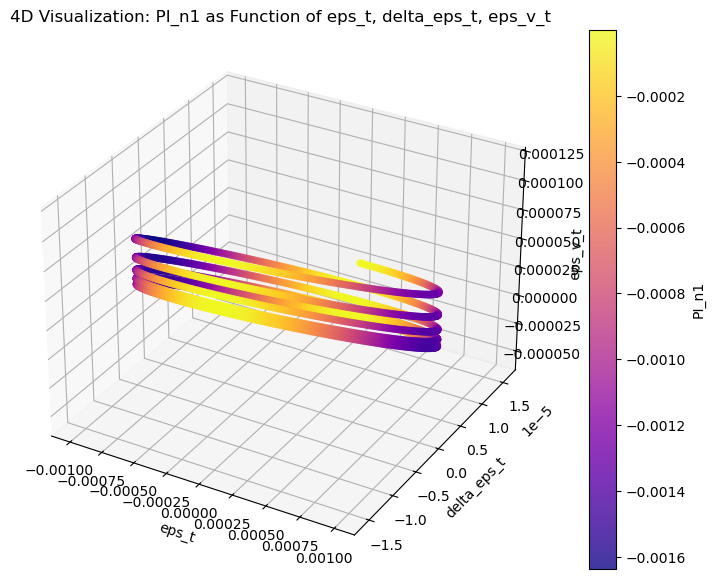

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

# Define the root directory of the dataset
data_root_dir = Path(os.path.expanduser("~")) / "bmcs_training_data"

# Get all subdirectories (assuming each subdirectory represents a sample)
sample_dirs = [d for d in data_root_dir.iterdir() if d.is_dir()]

# Select a sample dataset
selected_sample = sample_dirs[0]  # Modify index to choose a different sample

# Load sample data
sample_data = np.load(list(selected_sample.glob("Pi_data_*.npy"))[0])

# Extract variables
eps_t = sample_data[:, 0]  
delta_eps_t = sample_data[:, 1]  
eps_v_t = sample_data[:, 2]  
pi_n1 = sample_data[:, 4]  

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(eps_t, delta_eps_t, eps_v_t, c=pi_n1, cmap='plasma', alpha=0.8)
ax.set_xlabel("eps_t")
ax.set_ylabel("delta_eps_t")
ax.set_zlabel("eps_v_t")
ax.set_title("4D Visualization: PI_n1 as Function of eps_t, delta_eps_t, eps_v_t")

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label("PI_n1")

plt.show()


Text(0.5, 0.92, 'PI_n1 as a Function of eps_t and eps_v_t')

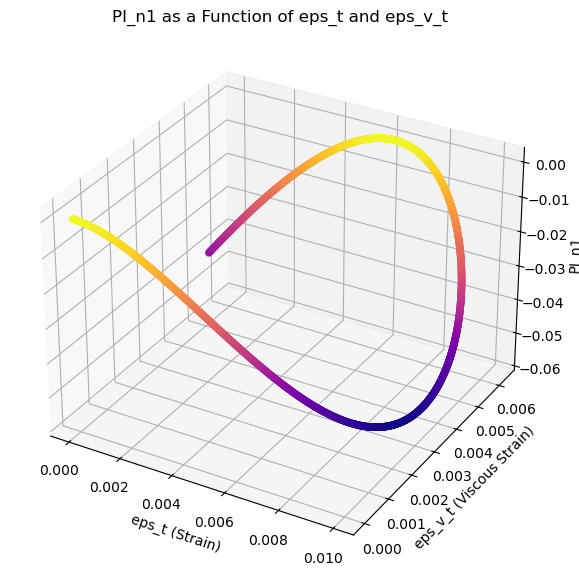

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

data_root_dir = Path(os.path.expanduser("~")) / "bmcs_training_data"
sample_data= np.load(data_root_dir / '1C_1.0A' / 'Pi_data_1C_1.0A.npy')  

# Extract relevant variables
eps_t = sample_data[:, 0]    # Strain
eps_v_t = sample_data[:, 2]  # Viscous strain
pi_n1 = sample_data[:, 4]    # PI_n1

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing PI_n1 values
sc = ax.scatter(eps_t, eps_v_t, pi_n1, c=pi_n1, cmap='plasma', alpha=0.7)

# Labels and title
ax.set_xlabel("eps_t (Strain)")
ax.set_ylabel("eps_v_t (Viscous Strain)")
ax.set_zlabel("PI_n1")
ax.set_title("PI_n1 as a Function of eps_t and eps_v_t")


In [ ]:

# Color bar for PI_n1 values
# plt.colorbar(sc, label="PI_n1")

# Show the plot
plt.show()






In [ ]:
def gsm_ve_simulation(GSM_VE, E_val=30e+3, eta_val=30e+6, d_t_val=0.01, final_time=20, cycle=2, amp=1, HHLL=False):
    """
    Run a GSM_VE simulation with given material parameters, time step, final time, and strain amplitude.
    
    Parameters:
    GSM_VE : object
        Instance of the GSM_VE model.
    E_val : float, optional
        Young's modulus in MPa (default is 30e+3 MPa).
    eta_val : float, optional
        Viscosity modulus in Pa/s (default is 30e+6 Pa/s).
    d_t_val : float, optional
        Time step in seconds (default is 0.01 s).
    final_time : float, optional
        Final time in seconds (default is 20 s).
    cycle : float, optional
        Number of cycles for sinusoidal strain (default is 2).
    amp : float, optional
        Strain amplitude in percentage (default is 1%).
    """
    # Initialize GSM_VE object
    pi_gsm_ve = GSM_VE()
        # Define material parameters
    mparams = (E_val, eta_val)
        # Generate time vector
    time_t = np.linspace(0, final_time, int(final_time / d_t_val) + 1)
    if HHLL==True:
        trend_factor = np.linspace(5, 10, len(time_t))  # Gradually increases over time
        case_name = f"HHLL_{cycle}C_{amp}A_{final_time}S"
    else:
        trend_factor =1
        case_name = f"{cycle}C_{amp}A_{final_time}S"
    eps_t = (amp / 100) * np.sin(np.pi * cycle * time_t / final_time) * trend_factor
    
    pi_gsm_ve.problem_name = case_name
        # Perform integration
    gsm_ve_data = pi_gsm_ve.perform_integration(eps_t, time_t, *mparams)
    print(f"Processed case: {case_name}")
    save_path = pi_gsm_ve.data_dir / f'{case_name}.png'
    # Create figure and axes
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))
    # Plot results
    pi_gsm_ve.plot_results(ax1, ax2, ax3, gsm_ve_data, case_name, 'blue')
    # Adjust layout
    fig.tight_layout()
    # Save the figure
    fig.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"data saved at: {pi_gsm_ve.data_dir}")
    print(f"Figure saved at: {save_path}")
    plt.close(fig)
    
    return gsm_ve_data, save_path


In [ ]:
# Creation of a data sample within the space of loadining's parameters space, but not on the grid + Doubling of the loading time 
gsm_ve_simulation(GSM_VE, E_val=30e+3, eta_val=30e+6, d_t_val=0.01, final_time=40, cycle=2.5, amp=1.45)
gsm_ve_simulation(GSM_VE, E_val=30e+3, eta_val=30e+6, d_t_val=0.01, final_time=20, cycle=4, amp=1, HHLL=True)

Processed case: 2.5C_1.45A_40S
data saved at: C:\Users\A_structure\bmcs_training_data\2.5C_1.45A_40S
Figure saved at: C:\Users\A_structure\bmcs_training_data\2.5C_1.45A_40S\2.5C_1.45A_40S.png
Processed case: HHLL_4C_1A_20S
data saved at: C:\Users\A_structure\bmcs_training_data\HHLL_4C_1A_20S
Figure saved at: C:\Users\A_structure\bmcs_training_data\HHLL_4C_1A_20S\HHLL_4C_1A_20S.png


(<gsm_ve.GSM_VE.DataContainer at 0x15500dfe350>,
 WindowsPath('C:/Users/A_structure/bmcs_training_data/HHLL_4C_1A_20S/HHLL_4C_1A_20S.png'))

In [ ]:
# loading sample data
# within the training space on the grid of loading parameters
sample_data_1 = np.load(data_root_dir / '2C_1.0A' / 'Pi_data_2C_1.0A.npy')  

# within the training space but between the grid of loading parameters
sample_data_2 = np.load(data_root_dir / '2.5C_1.45A_40S' / 'Pi_data_2.5C_1.45A_40S.npy') 

# within the training space but between the grid of loading parameters
sample_data_3 = np.load(data_root_dir / 'HHLL_4C_1A_20S' / 'Pi_data_HHLL_4C_1A_20S.npy') 

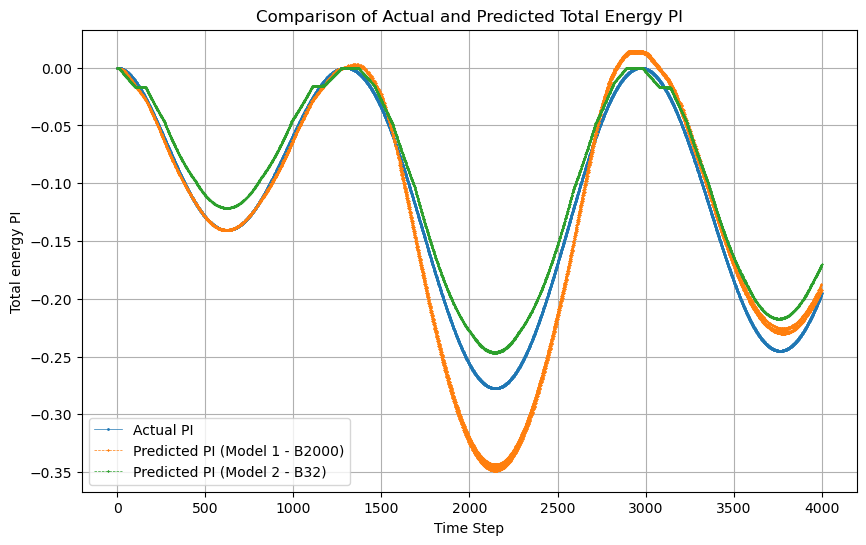

In [ ]:
# Load sample data
sample_data = sample_data_2

eps_t = sample_data[:, 0]  
dd_eps_t = sample_data[:, 1]  
eps_v_t = sample_data[:, 2]  
d_t = sample_data[:, 3]  
pi_n1 = sample_data[:, 4]  # Actual values

# Normalize inputs
mean = dataset.mean
std = dataset.std

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load models
model_1 = VE_TimeIntegrationPredictor().to(device)
model_1.load_state_dict(torch.load("ve_pi_p_e100_b2000.pth", map_location=device))
model_1.eval()

model_2 = VE_TimeIntegrationPredictor().to(device)
model_2.load_state_dict(torch.load("ve_pi_p_e100_b32.pth", map_location=device))
model_2.eval()

# Initialize lists for predictions
predictions_1 = []
predictions_2 = []

# Iterate through each data point
for i in range(len(eps_t)):
    input_vector = np.array([[eps_t[i], dd_eps_t[i], eps_v_t[i], d_t[i]]])
    input_normalized = (input_vector - mean) / std
    input_tensor = torch.tensor(input_normalized, dtype=torch.float32).to(device)
    
    with torch.no_grad():
        pred_1 = model_1(input_tensor).cpu().numpy().flatten()[0]
        pred_2 = model_2(input_tensor).cpu().numpy().flatten()[0]
    
    predictions_1.append(pred_1)
    predictions_2.append(pred_2)

# Convert lists to numpy arrays
predictions_1 = np.array(predictions_1)
predictions_2 = np.array(predictions_2)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(pi_n1, label='Actual PI', linestyle='-', marker='o', markersize=1, linewidth=0.5)
plt.plot(predictions_1 - predictions_1[0], label='Predicted PI (Model 1 - B2000)', linestyle='--', marker='x', markersize=1, linewidth=0.5)
plt.plot(predictions_2 - predictions_2[0], label='Predicted PI (Model 2 - B32)', linestyle='--', marker='x', markersize=1, linewidth=0.5)

plt.xlabel("Time Step")
plt.ylabel("Total energy PI")
plt.legend()
plt.title("Comparison of Actual and Predicted Total Energy PI")
plt.grid()
plt.show()


MSE: 8.153459
RMSE: 2.855426
MAE: 1.917952
R^2: 0.358041
Pearson Correlation: 0.978571


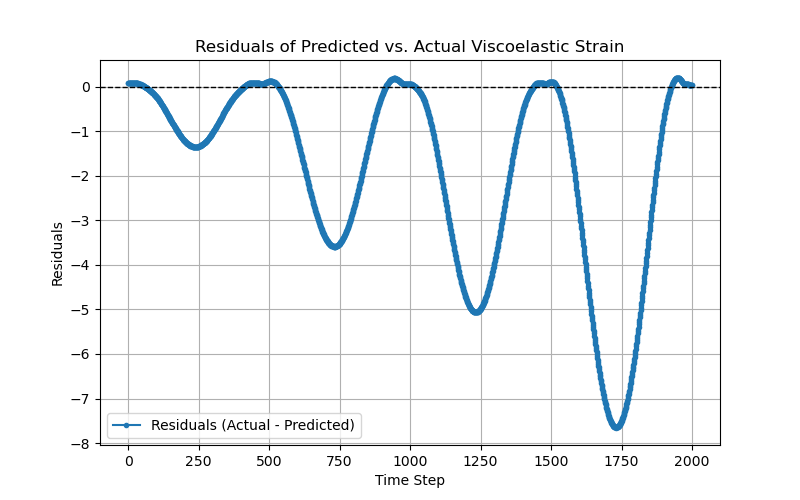

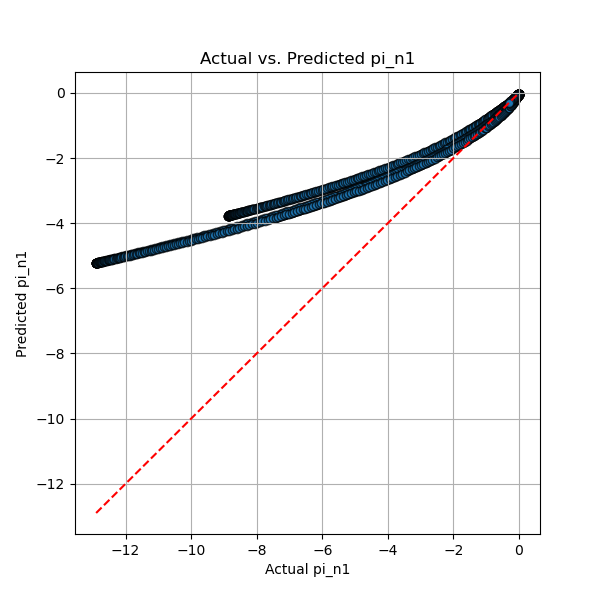

In [ ]:


# Compute Mean Squared Error (MSE)
mse = np.mean((pi_n1 - predictions_1) ** 2)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Compute Mean Absolute Error (MAE)
mae = np.mean(np.abs(pi_n1 - predictions_1))

# Compute R-squared (R²)
ss_total = np.sum((pi_n1 - np.mean(pi_n1)) ** 2)
ss_residual = np.sum((pi_n1 - predictions_1) ** 2)
r2 = 1 - (ss_residual / ss_total)

# Compute Pearson Correlation Coefficient (r)
pearson_corr, _ = pearsonr(pi_n1, predictions_1)

# Print the metrics
print(f'MSE: {mse:.6f}')
print(f'RMSE: {rmse:.6f}')
print(f'MAE: {mae:.6f}')
print(f'R^2: {r2:.6f}')
print(f'Pearson Correlation: {pearson_corr:.6f}')

# Residual Plot
plt.figure(figsize=(8, 5))
residuals = pi_n1 - predictions_1 -predictions_1[0]
plt.plot(residuals, label='Residuals (Actual - Predicted)', linestyle='-', marker='o', markersize=3)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero error line
plt.xlabel("Time Step")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals of Predicted vs. Actual Viscoelastic Strain")
plt.grid()
plt.show()

# Scatter Plot for Actual vs. Predicted
plt.figure(figsize=(6, 6))
plt.scatter(pi_n1, predictions_1, alpha=0.7, edgecolors='k')
plt.plot([min(pi_n1), max(pi_n1)], [min(pi_n1), max(pi_n1)], 'r--')  # Perfect fit line
plt.xlabel("Actual pi_n1")
plt.ylabel("Predicted pi_n1")
plt.title("Actual vs. Predicted pi_n1")
plt.grid()
plt.show()
